# <center>Hebb's Rule</center>
### <center>Calvin Chi</center>

Hebb's Rule is a simple binary classificaiton algorithm that finds a decision boundary resulting from the subtraction of two class centroids. Before we dive in, let as first understand what a centroid is and how a boundary can be constructed from the substraction of class two centroids. 

# Math Prerequisites
A centroid can be understood as the average in multiple dimensions, or the geometric center of $n$-dimensional space. Assume that $x^{(i)}$ is the $i$th sample with $n$ features, or $x \in \mathbb{R}^{1xn}$, then the centroid of $m$ such samples is computed as:

$$x_{c} = \frac{\sum_{i = 1}^{m}x^{(i)}}{m} \in \mathbb{R}^{1xn}$$

To visualize this:

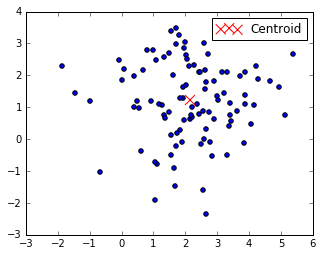

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

mu = [2, 1]
cov = np.array([[2, 0], [0, 2]])
points = np.random.multivariate_normal(mu, cov, 100)
centroid = np.mean(points, axis = 0)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroid[0], centroid[1], color="red", label="Centroid", marker="x", s = 100)
plt.legend(loc="upper right")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

To see how a plane can be contructed from a vector, imagine that we have a 2-dimensional weight vector $w \in \mathbb{R}^{2 x 1}$. The plane perpendicular to this vector is defined as:

$$w^{T}x = w_{1}x_{1} + w_{2}x_{2} = 0$$

Rearranging:

$$x_{2} = -\frac{w_{1}}{w_{2}} x_{1}$$ 

To visualize this, assume our $w$ is:

$$ w = \begin{bmatrix}
1\\
1\\
\end{bmatrix}$$

And contruct the line perpendicular to this weight vector.

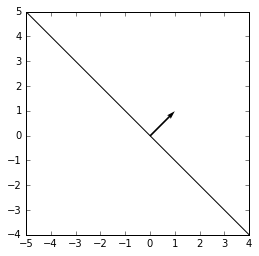

In [9]:
fig, ax = plt.subplots()
ax.quiver((0), (0), (1), (1), angles='xy', scale_units='xy', scale=1, color='black')
x = np.array(range(-5, 5))
y = -x
plt.plot(x, y, color="black")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Derivation


The decision boundary determined by Hebb's rule is the plane perpendicular to the vector resulting from the subtraction of two class centroids. Assume that we have $m_{1}$ samples of class $1$ and $m_{2}$ samples of class $2$:

$$w = \frac{\sum_{i = 1}^{m_{1}}x^{(i)}}{m_{1}} - \frac{\sum_{i = 1}^{m_{2}}x^{(i)}}{m_{2}}$$

Notice that if we cleverely denote one class as $+1$ and the other as $-1$, the above equation becomes:

$$w = \frac{\sum_{i = 1}^{m_{1}}y^{(i)}x^{(i)}}{m_{1}} + \frac{\sum_{i = 1}^{m_{2}}y^{(i)}x^{(i)}}{m_{2}}$$

Remember from above that the decision boundary is defined as:

$$w^{T}x = 0$$

Thus the denominators $m_{1}$ and $m_{2}$ do not matter, and the equation for $w$ is reduced to:

$$w = \sum_{i=1}^{T}y^{(i)}x^{(i)}$$

Where $T = m_{1} + m_{2}$. Once we have $w$, then we can construct our decision boundary. The classifer is:

$$f(x) = w^{T}x$$

When $f(x^{(i)}) > 0$, then sample $i$ is classified as class $+1$, and if $f(x^{(i)}) < 0$, then the sample $i$ is classified as class $-1$. If $f(x^{(i)}) = 0$, then the classificaiton is ambiguous because it lies on the decision boundary.

# Implementation

Let us visualize samples drawn from two different distributions belonging to different classes in two dimensions and the decision boundary that results from applying Hebb's rule.

[ 86.24049496  78.85898632]


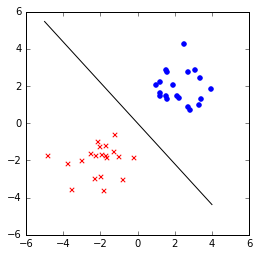

In [15]:
mu1 = [2, 2]
cov1 = np.array([[1, 0], [0, 1]])
class1 = np.random.multivariate_normal(mu1, cov1, 20)

mu2 = [-2, -2]
cov2 = np.array([[1, 0], [0, 1]])
class2 = np.random.multivariate_normal(mu2, cov2, 20)

w = np.sum(class1, axis = 0) + -np.sum(class2, axis = 0)
print(w)

def line(w, x):
    slope = -w[0]/w[1] 
    return slope*x

plt.scatter(class1[:, 0], class1[:, 1], color="blue")
plt.scatter(class2[:, 0], class2[:, 1], color="red", marker="x")
x = np.array(range(-5, 5))
y = line(w, x)
plt.plot(x, y, color="black")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

It can be seen that Hebb's rule works quite well in this example dataset. In general, Hebb's rule is robust to outliers because every sample "weighs in" in the construction of the decision boundary. This concludes the Hebb's rule tutorial!